# Analysing causes of cancer

### SEN163B - Responsible Data Analytics

Welcome to our code. We are:
- Allegra Melli 6104916, 
- Ann-Kathrin Peitz 6069819, 
- Julian Jahangir 5176379, 
- Jurriaan van Lanschot 4929357, 
- Tim Hol 4487346. 

We hope it contains everything required. If there are any questions please feel free to contact us. Kind regards, group 1.

# 0 - Setting up and importing the dataset

In [242]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns
from scipy.stats import pearsonr
import sklearn.model_selection
import sklearn.metrics
import sklearn.datasets
import sklearn.ensemble
import sklearn.preprocessing
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, balanced_accuracy_score, f1_score
from sklearn.preprocessing import LabelEncoder
from IPython.display import Markdown, display
import warnings
import lime
import lime.lime_tabular
from lime import submodular_pick
import shap
from shap.plots import _waterfall
import xgboost
from xgboost import plot_importance
import json
from collections import OrderedDict

cancer_df = pd.read_excel('Project_Data/cancer patient data sets.xlsx')
cancer_df_update = pd.read_excel('Project_Data/cancer patient data sets update.xlsx')

# 1 - Exploring the Cancer data

In [243]:
# Mapping 'Level' from 'low', 'medium', 'high' to 1, 2, 3
level_mapping = {'Low': 1, 'Medium': 2, 'High': 3}
cancer_df['Level'] = cancer_df['Level'].map(level_mapping)

# cancer_df now has the 'Level' variable with values 1, 2, 3

In [244]:
# The imported dataset in a dataframe
cancer_df

,Patient Id,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,Balanced Diet,...,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level
0,P1,33,1,2,4,5,4,3,2,2,...,3,4,2,2,3,1,2,3,4,1
1,P10,17,1,3,1,5,3,4,2,2,...,1,3,7,8,6,2,1,7,2,2
2,P100,35,1,4,5,6,5,5,4,6,...,8,7,9,2,1,4,6,7,2,3
3,P1000,37,1,7,7,7,7,6,7,7,...,4,2,3,1,4,5,6,7,5,3
4,P101,46,1,6,8,7,7,7,6,7,...,3,2,4,1,4,2,4,2,3,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,P995,44,1,6,7,7,7,7,6,7,...,5,3,2,7,8,2,4,5,3,3
996,P996,37,2,6,8,7,7,7,6,7,...,9,6,5,7,2,4,3,1,4,3
997,P997,25,2,4,5,6,5,5,4,6,...,8,7,9,2,1,4,6,7,2,3
998,P998,18,2,6,8,7,7,7,6,7,...,3,2,4,1,4,2,4,2,3,3


In [245]:
# Exploring all columns
cancer_df.columns

Index(['Patient Id', 'Age', 'Gender', 'Air Pollution', 'Alcohol use',
       'Dust Allergy', 'OccuPational Hazards', 'Genetic Risk',
       'chronic Lung Disease', 'Balanced Diet', 'Obesity', 'Smoking',
       'Passive Smoker', 'Chest Pain', 'Coughing of Blood', 'Fatigue',
       'Weight Loss', 'Shortness of Breath', 'Wheezing',
       'Swallowing Difficulty', 'Clubbing of Finger Nails', 'Frequent Cold',
       'Dry Cough', 'Snoring', 'Level'],
      dtype='object')

### 1.1 Data Cleaning and Preprocessing

# 2 - Descriptive Analytics

For the descriptive analytics some fundamental lifestyle and demographic characteristics are investigated, which are considered important by literature. Both because these characteristics might serve later as good predictors, but also because these characteristics can be considered as variables that are potentially sensitive to biases. Therefore, it is important to study their prevalence in the dataset, so the potential impacts and later potential relations with other variables can be accounted for.

### 2.1 Age and gender distributions

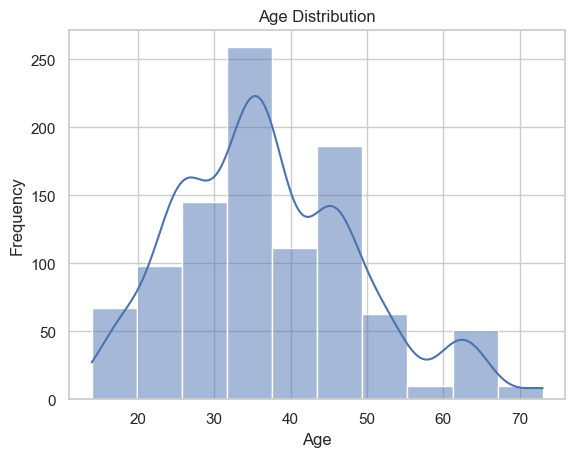

In [246]:
# Observing the age distribution within the dataset
sns.histplot(cancer_df['Age'], bins=10, kde=True)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

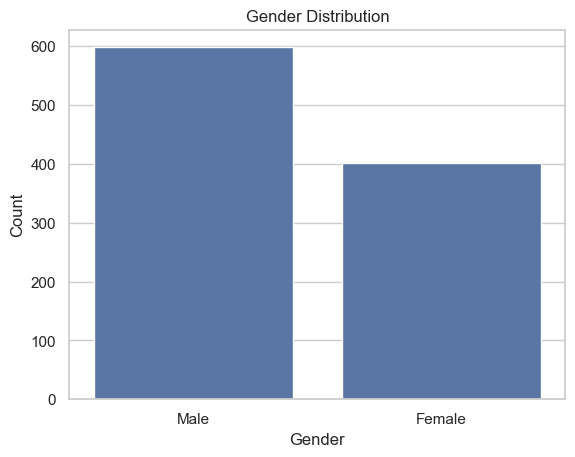

In [247]:
# The Gender distribution of the dataset
sns.countplot(x='Gender', data=cancer_df)
plt.title('Gender Distribution')
plt.xticks([0, 1], ['Male', 'Female'], rotation=0)  # Adjust as necessary
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

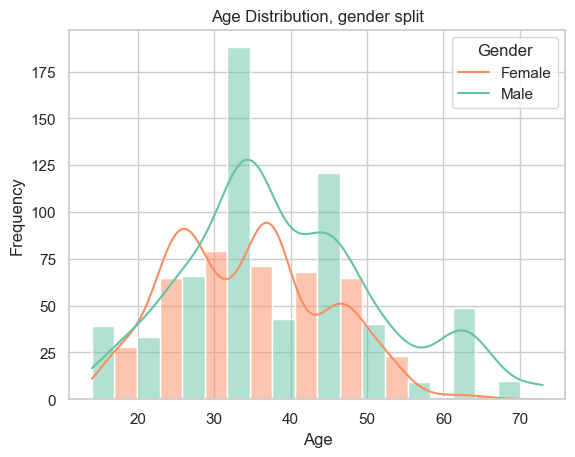

In [248]:
# Observing the age and gender distribution within the dataset
age_gender_plot = sns.histplot(data=cancer_df, x='Age', hue='Gender', multiple='dodge', bins=10, kde=True, palette='Set2')
plt.title('Age Distribution, gender split')
plt.xlabel('Age')
plt.ylabel('Frequency')
age_gender_plot.legend(title='Gender', labels=['Female', 'Male'])
plt.show()

### 2.2 - Disease Severity

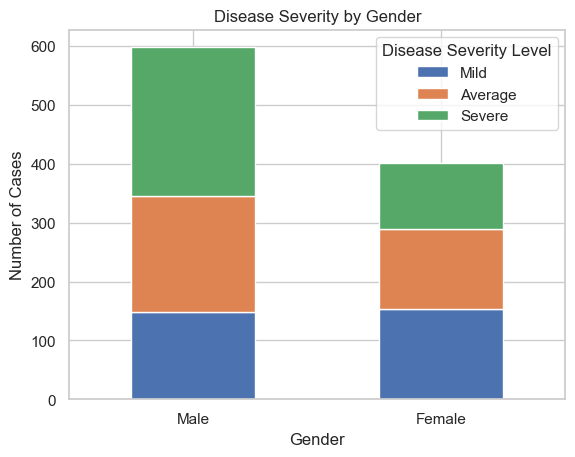

In [249]:
# Amount of cases and their severity vs the gender division
pd.crosstab(cancer_df['Gender'], cancer_df['Level']).plot(kind='bar', stacked=True)
plt.title('Disease Severity by Gender')
plt.xlabel('Gender')
plt.ylabel('Number of Cases')
plt.xticks([0, 1], ['Male', 'Female'], rotation=0)  # Adjust as necessary
plt.legend(title='Disease Severity Level', labels=['Mild', 'Average', 'Severe'])

C:\Users\TimEW\AppData\Local\Temp\ipykernel_15872\3649183723.py:11: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  level_gender_plot.set_xticklabels(['Mild', 'Average', 'Severe'])


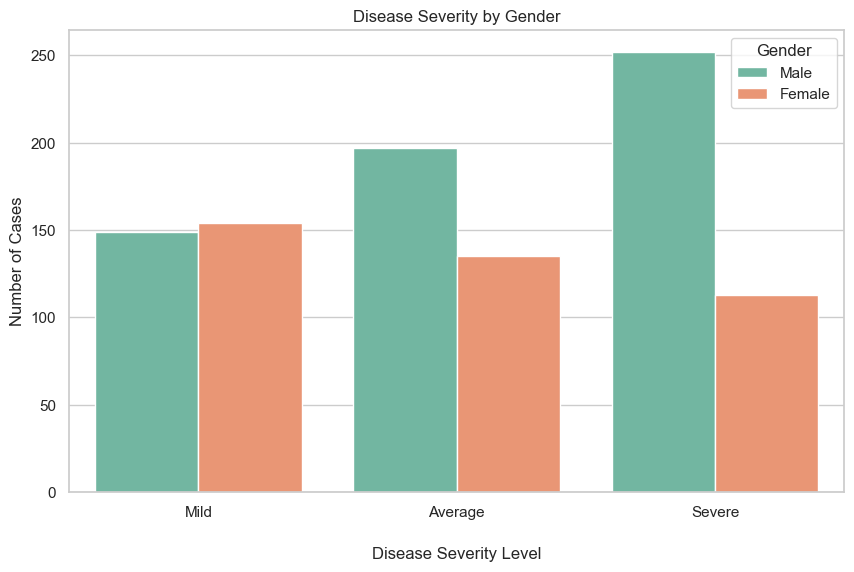

In [250]:
# Level of disease severity by gender, split per level
# Assuming cancer_df is your DataFrame
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))

# Making a countplot for the different disease levels per gender
level_gender_plot = sns.countplot(data=cancer_df, x='Level', hue='Gender', palette='Set2')

plt.title('Disease Severity by Gender')
plt.xlabel('Disease Severity Level', labelpad=20)
level_gender_plot.set_xticklabels(['Mild', 'Average', 'Severe'])
plt.ylabel('Number of Cases')
plt.legend(title='Gender', labels=['Male', 'Female'])
plt.show()

C:\Users\TimEW\AppData\Local\Temp\ipykernel_15872\2723874333.py:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  age_level_plot.set_xticklabels(['Mild', 'Average', 'Severe'])


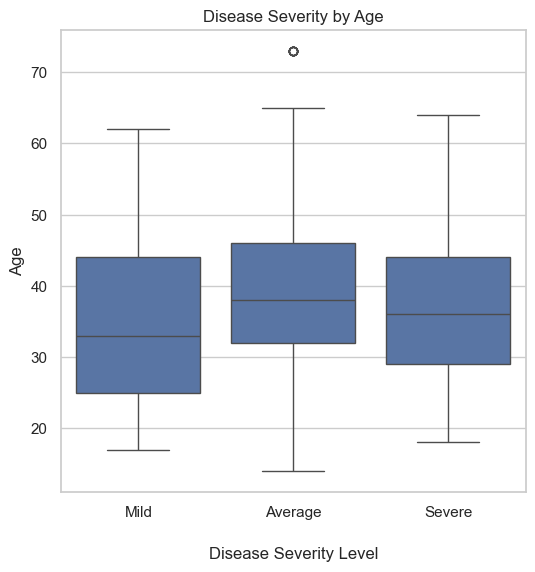

In [251]:
# Disease Severity by age
sns.set(style="whitegrid")
plt.figure(figsize=(6, 6))

# Creating a box plot per disease level for the ages
age_level_plot = sns.boxplot(data=cancer_df, x = 'Level', y = 'Age')
plt.title('Disease Severity by Age')
age_level_plot.set_xticklabels(['Mild', 'Average', 'Severe'])
plt.xlabel('Disease Severity Level', labelpad=20)
plt.ylabel('Age')
plt.show()

C:\Users\TimEW\AppData\Local\Temp\ipykernel_15872\915322767.py:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  age_gender_level_plot.set_xticklabels(['Mild', 'Average', 'Severe'])


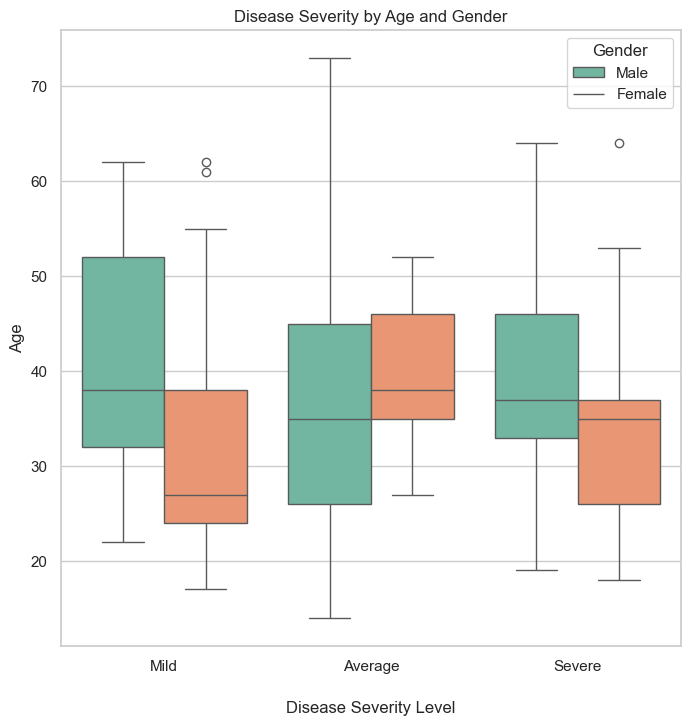

In [252]:
# Disease Severity by gender and age
sns.set(style="whitegrid")
plt.figure(figsize=(8, 8))

# Creating the plot
age_gender_level_plot = sns.boxplot(data=cancer_df, x = 'Level', y = 'Age', hue='Gender', palette='Set2', legend='full')
plt.title('Disease Severity by Age and Gender')
age_gender_level_plot.set_xticklabels(['Mild', 'Average', 'Severe'])
plt.xlabel('Disease Severity Level', labelpad=20)
plt.ylabel('Age')
age_gender_level_plot.legend(title='Gender', labels=['Male', 'Female'])
plt.show()

### 2.3 Smoking distributions

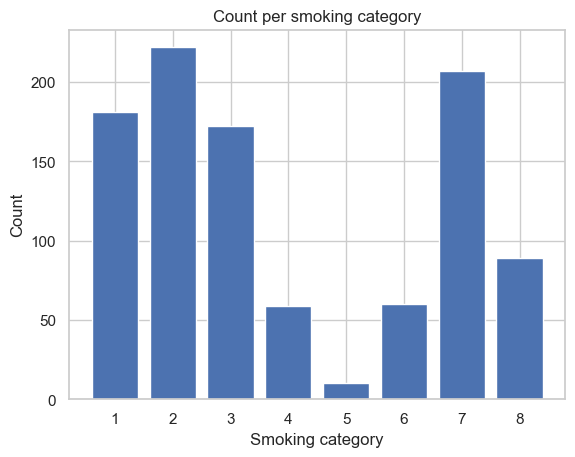

In [253]:
# Count occurrences of each unique value in the 'Smoking' column
smoking_counts = cancer_df['Smoking'].value_counts()

# Plotting
plt.bar(smoking_counts.index, smoking_counts.values)
plt.xlabel('Smoking category')
plt.ylabel('Count')
plt.title('Count per smoking category')
plt.show()

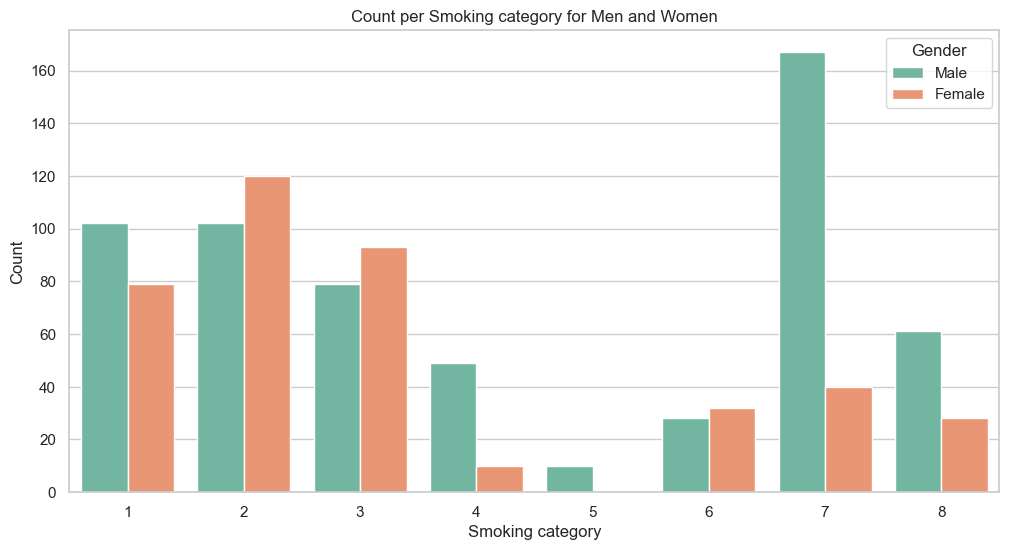

In [254]:
# Smoking category per gender
sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))

# Creating a count plot for the smoking values per catagory split for Gender
sns.countplot(data=cancer_df, x='Smoking', hue='Gender', palette='Set2')
plt.xlabel('Smoking category')
plt.ylabel('Count')
plt.title('Count per Smoking category for Men and Women')
plt.legend(title='Gender', labels=['Male', 'Female'])
plt.xticks()
plt.show()

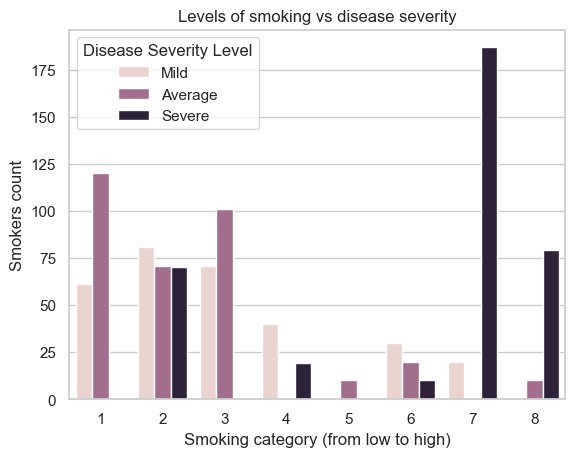

In [255]:
# Smoking level vs Disease Severity
sns.countplot(data=cancer_df, x = 'Smoking', hue = 'Level')
plt.title('Levels of smoking vs disease severity')
plt.legend(title='Disease Severity Level', labels=['Mild', 'Average', 'Severe', ])
plt.xlabel('Smoking category (from low to high)')
plt.ylabel('Smokers count')
plt.show()

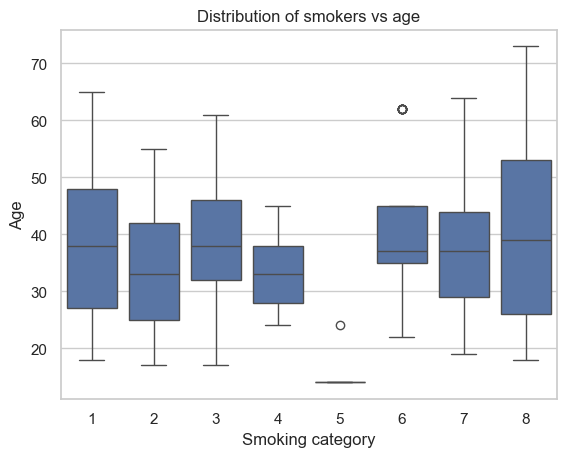

In [256]:
# Smoking level vs age
smoke_age_plot = sns.boxplot(data=cancer_df, x='Smoking', y='Age')
plt.title('Distribution of smokers vs age')
plt.xlabel('Smoking category')
plt.show()

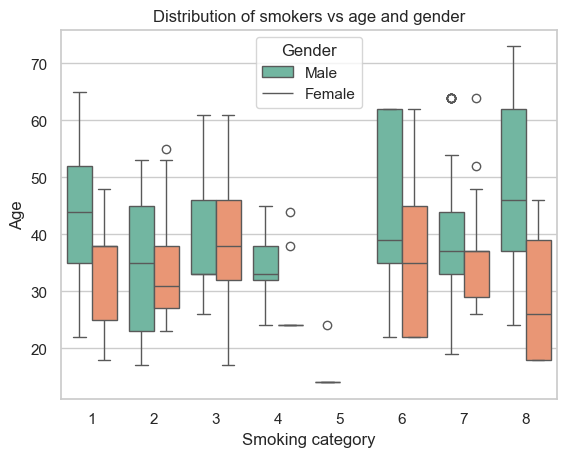

In [257]:
# Smoking level vs age and gender
smoke_age_gender_plot = sns.boxplot(data=cancer_df, x='Smoking', y='Age', hue='Gender', palette='Set2')
plt.title('Distribution of smokers vs age and gender')
plt.xlabel('Smoking category')
plt.legend(title='Gender', labels=['Male', 'Female'])
plt.show()

C:\Users\TimEW\AppData\Local\Temp\ipykernel_15872\789224420.py:6: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'Male' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  cancer_df_gender.loc[cancer_df_gender['Gender'] == 1, 'Gender'] = 'Male'


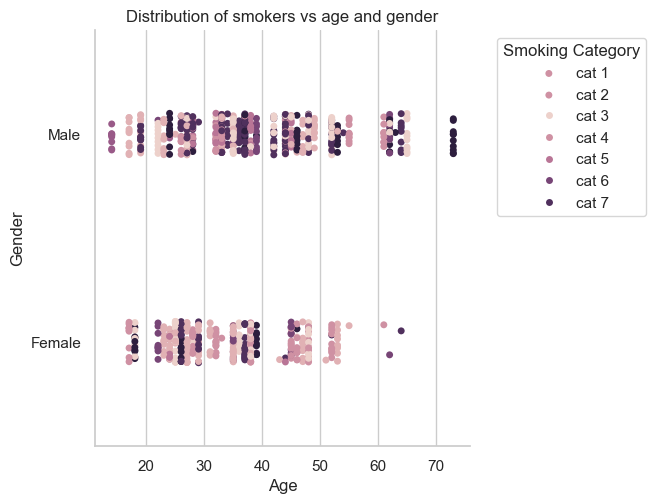

In [258]:
# Visualizing the same data in a catplot
# The dataframe needs to be copied before recoding
cancer_df_gender = cancer_df.copy()

# Replace numeric values with string labels in the copied dataset
cancer_df_gender.loc[cancer_df_gender['Gender'] == 1, 'Gender'] = 'Male'
cancer_df_gender.loc[cancer_df_gender['Gender'] == 2, 'Gender'] = 'Female'
catplot_smokes_age_gender = sns.catplot(data=cancer_df_gender, x = 'Age', y = 'Gender', hue='Smoking')
catplot_smokes_age_gender._legend.remove()
plt.title('Distribution of smokers vs age and gender')
plt.xlabel('Age')
plt.ylabel('Gender')
plt.legend(title='Smoking Category', labels=['cat 1', 'cat 2', 'cat 3', 'cat 4', 'cat 5', 'cat 6', 'cat 7'], bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

### 2.4 Air pollution

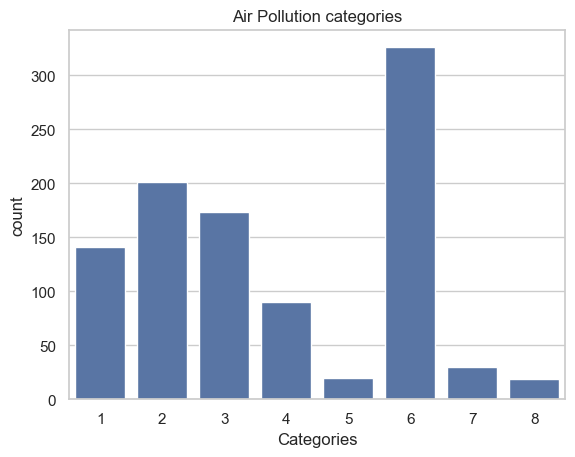

In [259]:
# Making a Air pollution histogram
sns.countplot(data=cancer_df, x='Air Pollution')
plt.title('Air Pollution categories')
plt.xlabel('Categories')
plt.show()

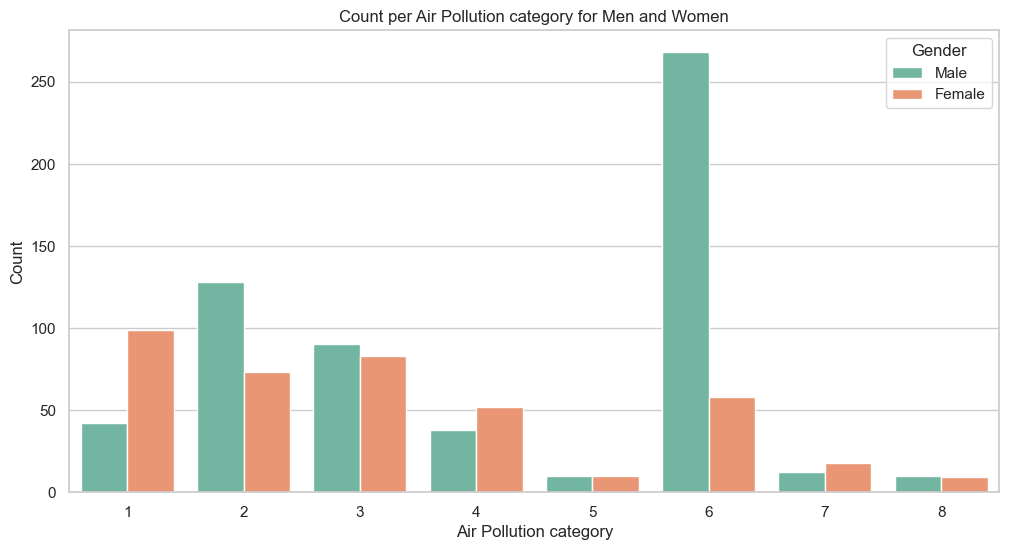

In [260]:
# Air pollution category per gender
sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))

# Assuming 'Gender' is the column name for gender
sns.countplot(data=cancer_df, x='Air Pollution', hue='Gender', palette='Set2')
plt.xlabel('Air Pollution category')
plt.ylabel('Count')
plt.title('Count per Air Pollution category for Men and Women')
plt.legend(title='Gender', labels=['Male', 'Female'])
plt.xticks()
plt.show()

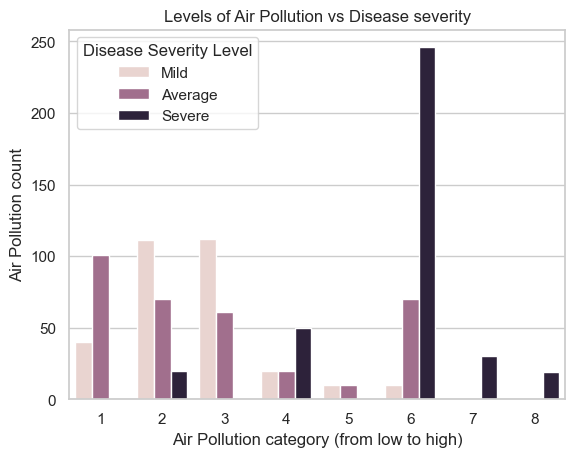

In [261]:
# air pollution level vs Disease Severity
sns.countplot(data=cancer_df, x = 'Air Pollution', hue = 'Level')
plt.title('Levels of Air Pollution vs Disease severity')
plt.legend(title='Disease Severity Level', labels=['Mild', 'Average', 'Severe'])
plt.xlabel('Air Pollution category (from low to high)')
plt.ylabel('Air Pollution count')
plt.show()

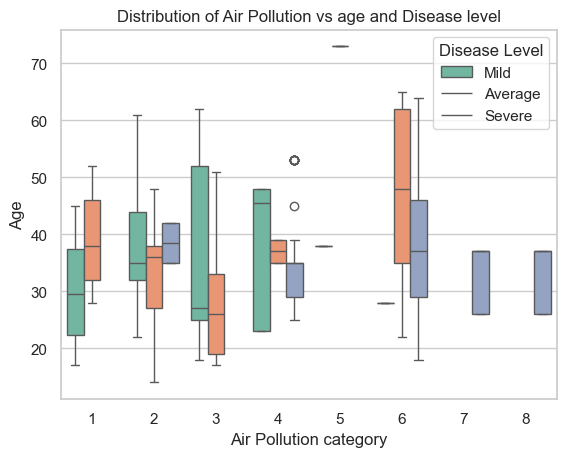

In [262]:
# Air pollution level vs age
air_age_plot = sns.boxplot(data=cancer_df, x='Air Pollution', y='Age', hue='Level', palette='Set2')
plt.title('Distribution of Air Pollution vs age and Disease level')
plt.xlabel('Air Pollution category')
plt.legend(title='Disease Level', labels=['Mild', 'Average', 'Severe'])
plt.show()

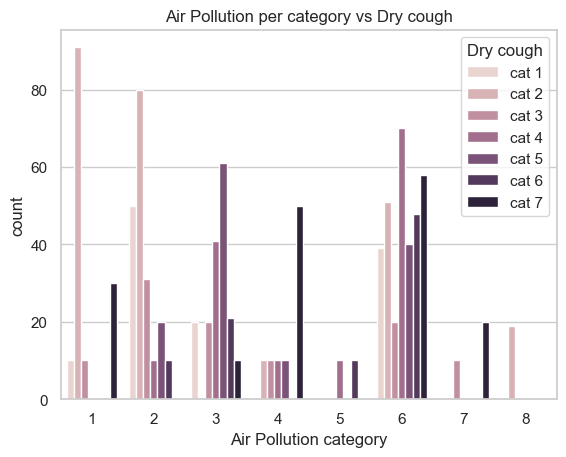

In [263]:
# Air pollution level vs dry cough
air_cough_plot = sns.countplot(data=cancer_df, x='Air Pollution', hue='Dry Cough')
plt.title('Air Pollution per category vs Dry cough')
plt.xlabel('Air Pollution category')
plt.legend(title='Dry cough', labels=['cat 1', 'cat 2', 'cat 3', 'cat 4', 'cat 5', 'cat 6', 'cat 7'])
plt.show()

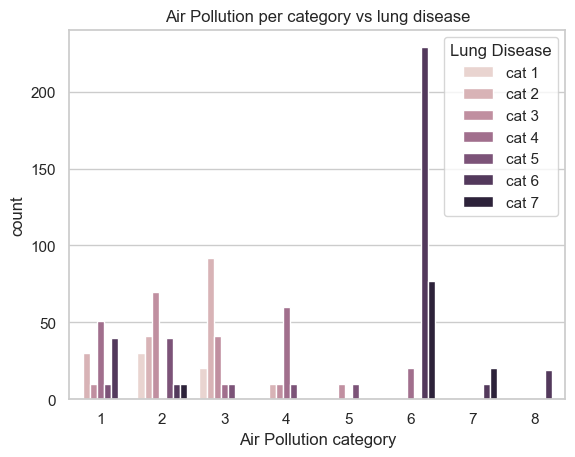

In [264]:
# Air pollution level vs dry cough
air_lung_plot = sns.countplot(data=cancer_df, x='Air Pollution', hue='chronic Lung Disease')
plt.title('Air Pollution per category vs lung disease')
plt.xlabel('Air Pollution category')
plt.legend(title='Lung Disease', labels=['cat 1', 'cat 2', 'cat 3', 'cat 4', 'cat 5', 'cat 6', 'cat 7'])
plt.show()

### 2.5 Obesity

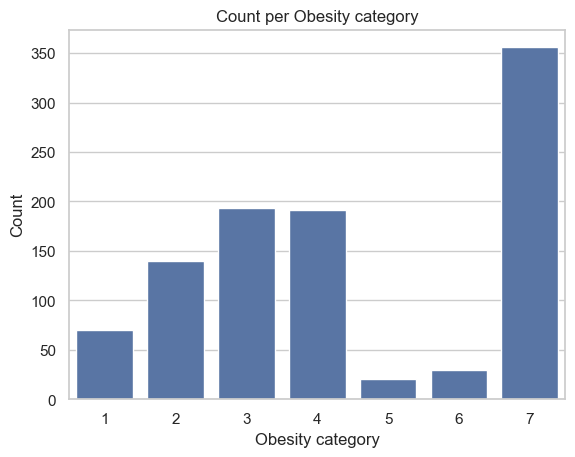

In [265]:
# Count occurrences of each unique value in the 'Smoking' column
obesity_counts = sns.countplot(data=cancer_df, x='Obesity')

# Plotting
plt.xlabel('Obesity category')
plt.ylabel('Count')
plt.title('Count per Obesity category')
plt.show()

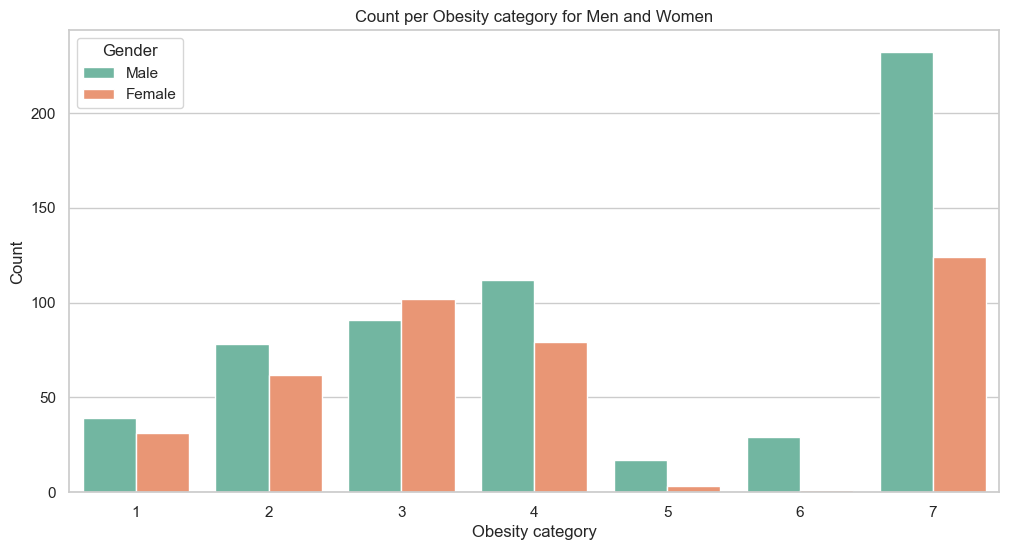

In [266]:
# Obesity category per gender
sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))

# Assuming 'Gender' is the column name for gender
sns.countplot(data=cancer_df, x='Obesity', hue='Gender', palette='Set2')
plt.xlabel('Obesity category')
plt.ylabel('Count')
plt.title('Count per Obesity category for Men and Women')
plt.legend(title='Gender', labels=['Male', 'Female'])
plt.xticks()
plt.show()

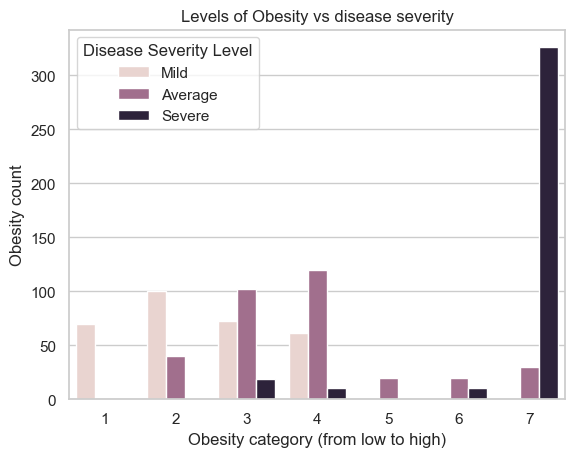

In [267]:
# Obesity level vs Disease Severity
sns.countplot(data=cancer_df, x='Obesity', hue='Level')
plt.title('Levels of Obesity vs disease severity')
plt.legend(title='Disease Severity Level', labels=['Mild', 'Average', 'Severe', ])
plt.xlabel('Obesity category (from low to high)')
plt.ylabel('Obesity count')
plt.show()

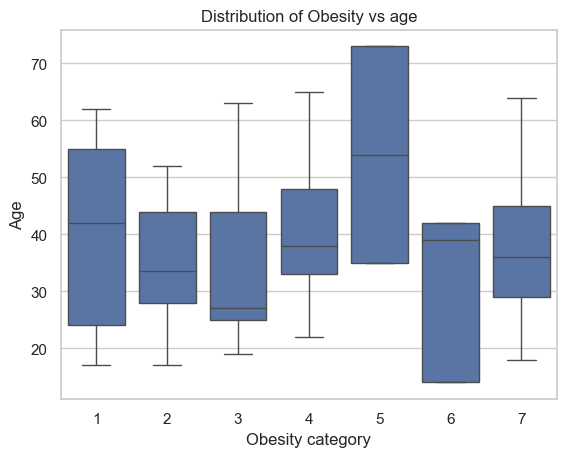

In [268]:
# Obesity level vs age
obesity_age_plot = sns.boxplot(data=cancer_df, x='Obesity', y='Age')
plt.title('Distribution of Obesity vs age')
plt.xlabel('Obesity category')
plt.show()

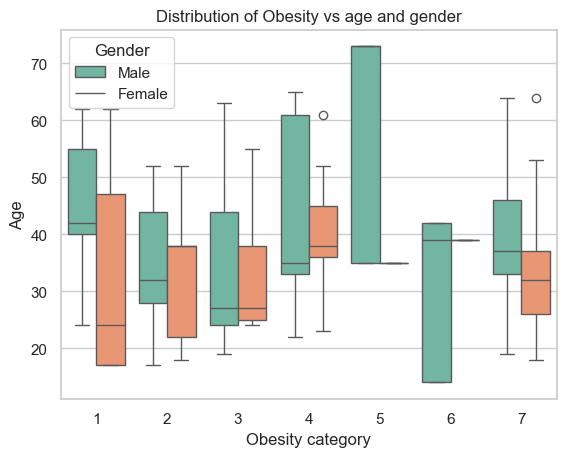

In [269]:
# Obesity level vs age and gender
obesity_age_gender_plot = sns.boxplot(data=cancer_df, x='Obesity', y='Age', hue='Gender', palette='Set2')
plt.title('Distribution of Obesity vs age and gender')
plt.xlabel('Obesity category')
plt.legend(title='Gender', labels=['Male', 'Female'])
plt.show()

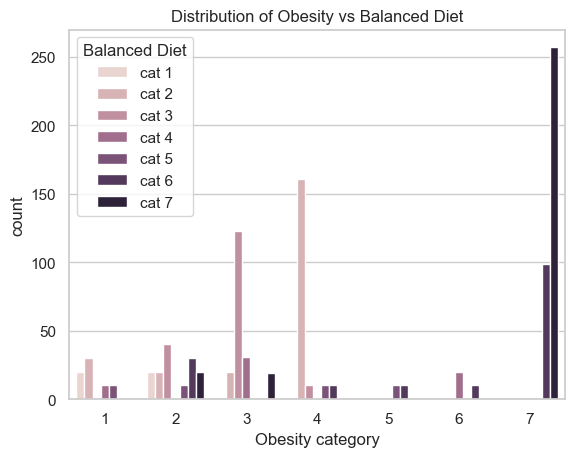

In [270]:
# Obesity level vs balanced diet
obesity_age_diet_plot = sns.countplot(data=cancer_df, x='Obesity', hue='Balanced Diet')
plt.title('Distribution of Obesity vs Balanced Diet')
plt.xlabel('Obesity category')
plt.legend(title='Balanced Diet', labels=['cat 1', 'cat 2', 'cat 3', 'cat 4', 'cat 5', 'cat 6', 'cat 7'])
plt.show()

### 2.6 Genetic Risk

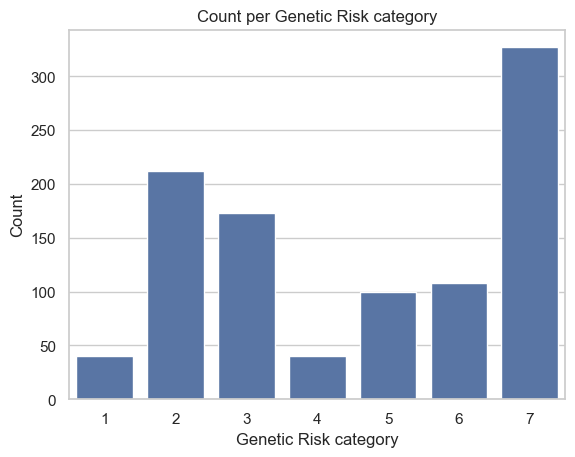

In [271]:
# Count occurrences of each unique value in the Genetic Risk column
genetic_risk_counts = sns.countplot(data=cancer_df, x='Genetic Risk')

# Plotting
plt.xlabel('Genetic Risk category')
plt.ylabel('Count')
plt.title('Count per Genetic Risk category')
plt.show()

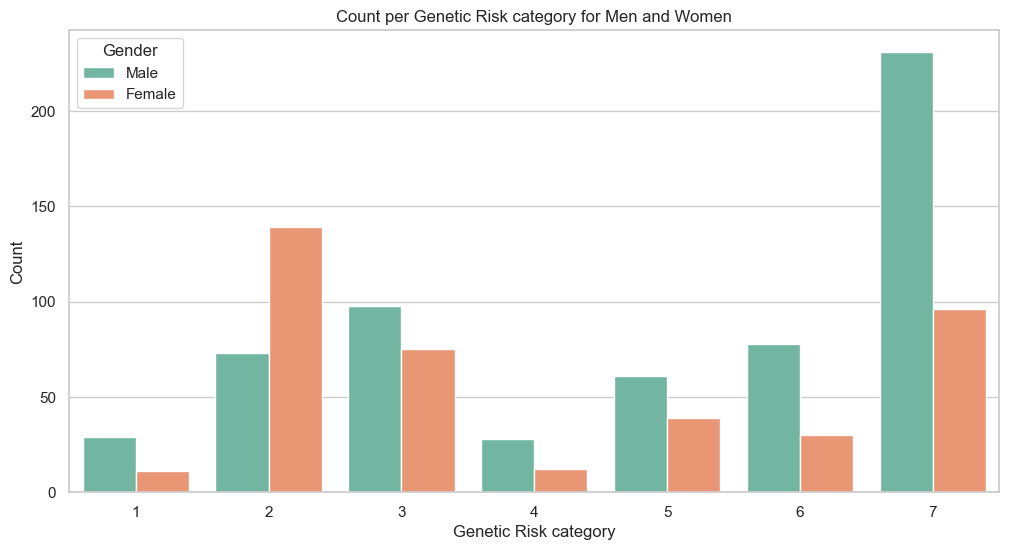

In [272]:
# Genetic Risk category per gender
sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))

# Countplot Genetic Risk and Gender
sns.countplot(data=cancer_df, x='Genetic Risk', hue='Gender', palette='Set2')
plt.xlabel('Genetic Risk category')
plt.ylabel('Count')
plt.title('Count per Genetic Risk category for Men and Women')
plt.legend(title='Gender', labels=['Male', 'Female'])
plt.xticks()
plt.show()

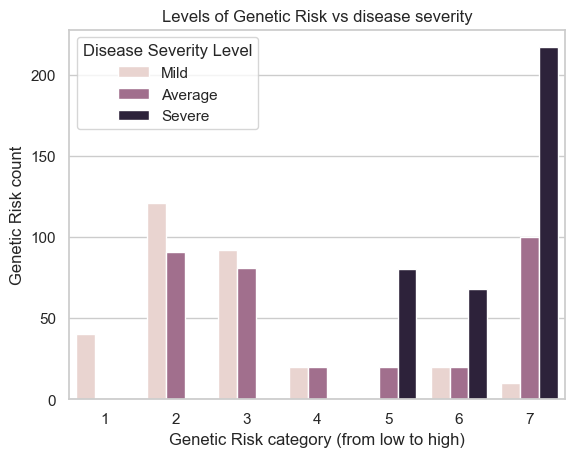

In [273]:
# Genetic Risk level vs Disease Severity
sns.countplot(data=cancer_df, x='Genetic Risk', hue='Level')
plt.title('Levels of Genetic Risk vs disease severity')
plt.legend(title='Disease Severity Level', labels=['Mild', 'Average', 'Severe', ])
plt.xlabel('Genetic Risk category (from low to high)')
plt.ylabel('Genetic Risk count')
plt.show()

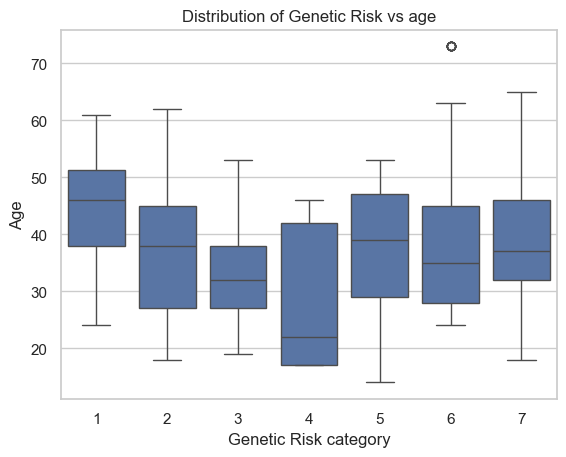

In [274]:
# Genetic Risk level vs age
genetic_risk_age_plot = sns.boxplot(data=cancer_df, x='Genetic Risk', y='Age')
plt.title('Distribution of Genetic Risk vs age')
plt.xlabel('Genetic Risk category')
plt.show()

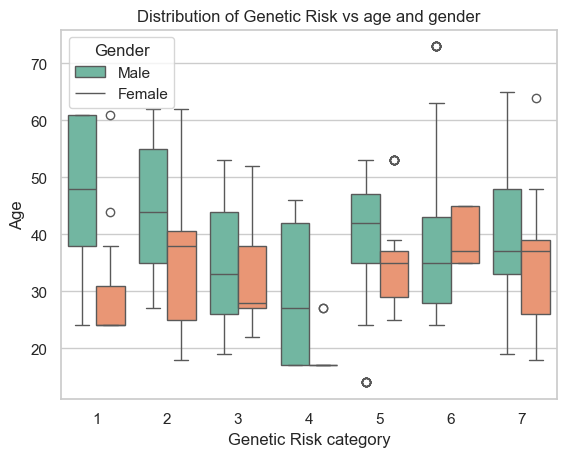

In [275]:
# Genetic Risk level vs age and gender
genetic_risk_age_gender_plot = sns.boxplot(data=cancer_df, x='Genetic Risk', y='Age', hue='Gender', palette='Set2')
plt.title('Distribution of Genetic Risk vs age and gender')
plt.xlabel('Genetic Risk category')
plt.legend(title='Gender', labels=['Male', 'Female'])
plt.show()

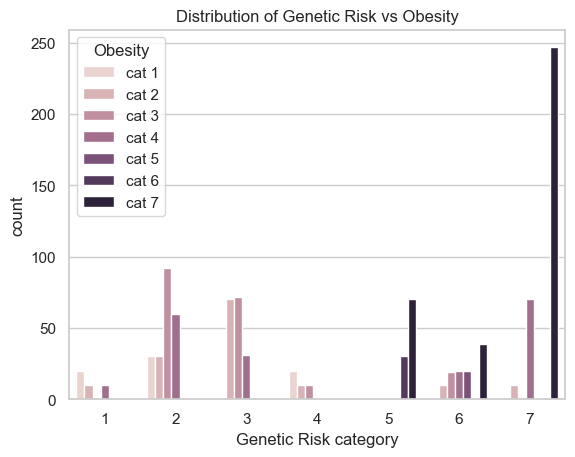

In [276]:
# Genetic Risk level vs balanced diet
genetic_risk_age_diet_plot = sns.countplot(data=cancer_df, x='Genetic Risk', hue='Obesity')
plt.title('Distribution of Genetic Risk vs Obesity')
plt.xlabel('Genetic Risk category')
plt.legend(title='Obesity', labels=['cat 1', 'cat 2', 'cat 3', 'cat 4', 'cat 5', 'cat 6', 'cat 7'])
plt.show()

# Diagnostic Analysis
Diagnostic Analytics After having performed the description of the dataset, you will be running a diagnostic analysis on the dataset. The goal of diagnostic analytics is to determine the causes of trends and correlations between variables. Required activities
Analyze missing data and determine relevant causes.
Perform correlation analysis among variables and between variables and the target variable for prediction (and corresponding statistical testing).
Perform statistical testing between subgroups of features.
Analyse the dataset and identify potential risks and bias.
Reflect on the analysis you carried and identity possible negative implications.
Propose, explore, and implement bias mitigation (reflect on the limitations)

In [277]:
print(cancer_df.isnull().values.any())

False


In [278]:
print(cancer_df.isnull().sum())

Patient Id                  0
Age                         0
Gender                      0
Air Pollution               0
Alcohol use                 0
Dust Allergy                0
OccuPational Hazards        0
Genetic Risk                0
chronic Lung Disease        0
Balanced Diet               0
Obesity                     0
Smoking                     0
Passive Smoker              0
Chest Pain                  0
Coughing of Blood           0
Fatigue                     0
Weight Loss                 0
Shortness of Breath         0
Wheezing                    0
Swallowing Difficulty       0
Clubbing of Finger Nails    0
Frequent Cold               0
Dry Cough                   0
Snoring                     0
Level                       0
dtype: int64


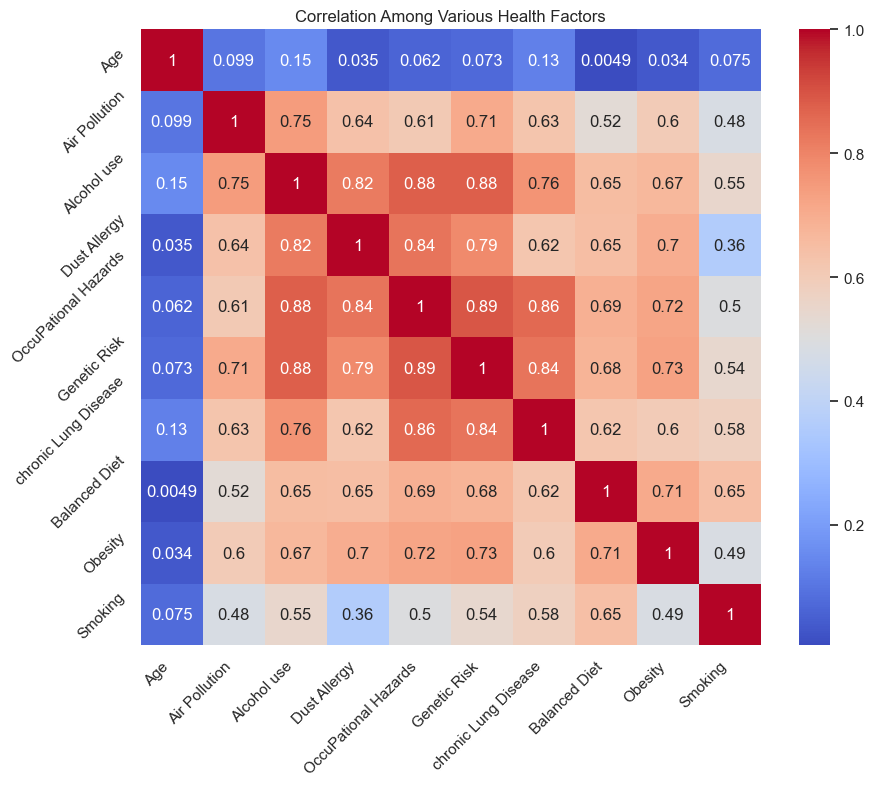

In [279]:

plt.figure(figsize=(10, 8))
corr = cancer_df[['Age', 'Air Pollution', 'Alcohol use', 'Dust Allergy', 'OccuPational Hazards', 'Genetic Risk',
                   'chronic Lung Disease', 'Balanced Diet', 'Obesity', 'Smoking']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Among Various Health Factors')
plt.xticks(rotation=45, ha='right')  # Improve readability of x-axis labels
plt.yticks(rotation=45)  # Improve readability of y-axis labels
plt.show()


In [280]:
print(cancer_df['Level'])

0      1
1      2
2      3
3      3
4      3
      ..
995    3
996    3
997    3
998    3
999    3
Name: Level, Length: 1000, dtype: int64


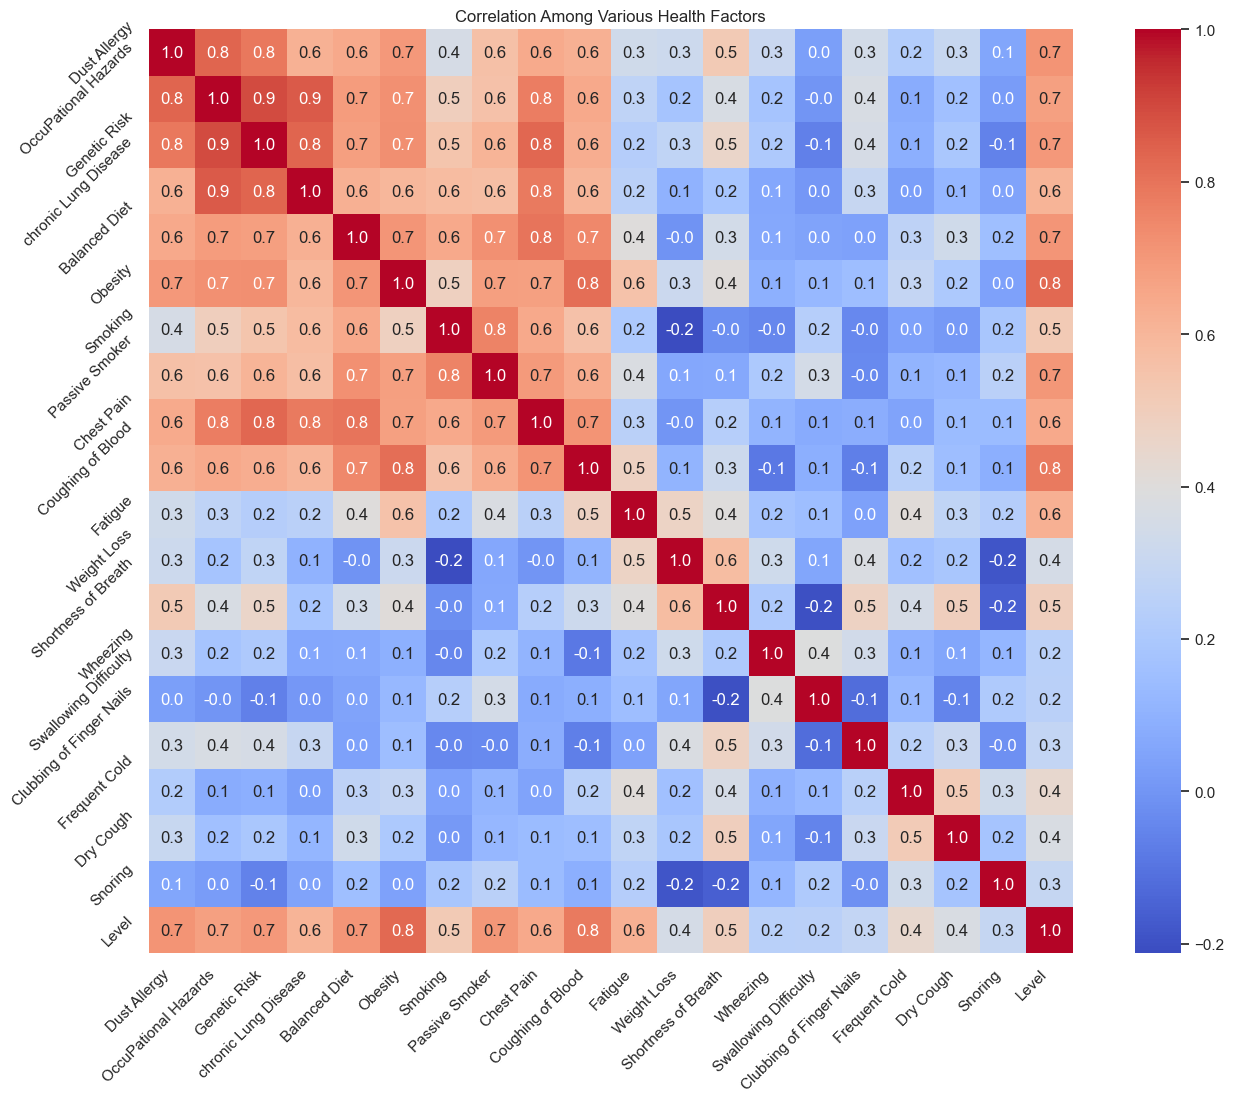

In [281]:
plt.figure(figsize=(16, 12))  # Increased figure size for readability with more variables
corr = cancer_df[['Dust Allergy', 'OccuPational Hazards', 'Genetic Risk',
                   'chronic Lung Disease', 'Balanced Diet', 'Obesity', 'Smoking',
                   'Passive Smoker', 'Chest Pain', 'Coughing of Blood', 'Fatigue',
                   'Weight Loss', 'Shortness of Breath', 'Wheezing',
                   'Swallowing Difficulty', 'Clubbing of Finger Nails', 'Frequent Cold',
                   'Dry Cough', 'Snoring', "Level"]].corr()  # Selected all listed attributes
sns.heatmap(corr, annot=True, fmt='.1f', cmap='coolwarm', square=True)
plt.title('Correlation Among Various Health Factors')
plt.xticks(rotation=45, ha='right')  # Improve readability of x-axis labels
plt.yticks(rotation=45)  # Improve readability of y-axis labels
plt.show()

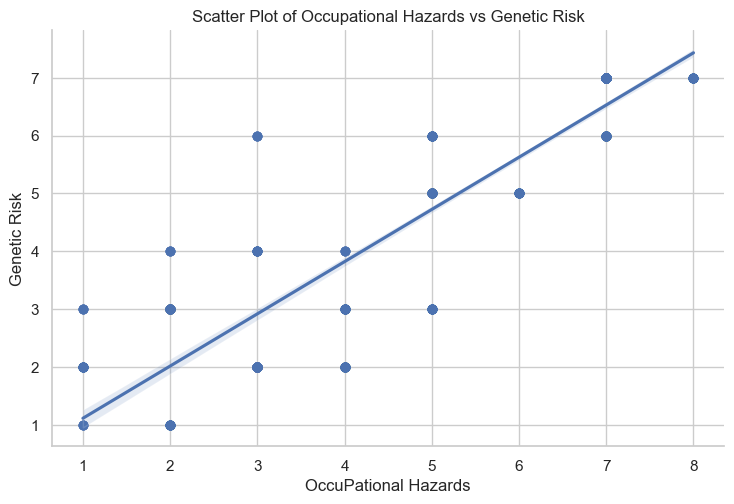

In [282]:
sns.lmplot(x='OccuPational Hazards', y='Genetic Risk', data=cancer_df, aspect=1.5, scatter_kws={'alpha':0.5})
plt.title('Scatter Plot of Occupational Hazards vs Genetic Risk')
plt.show()

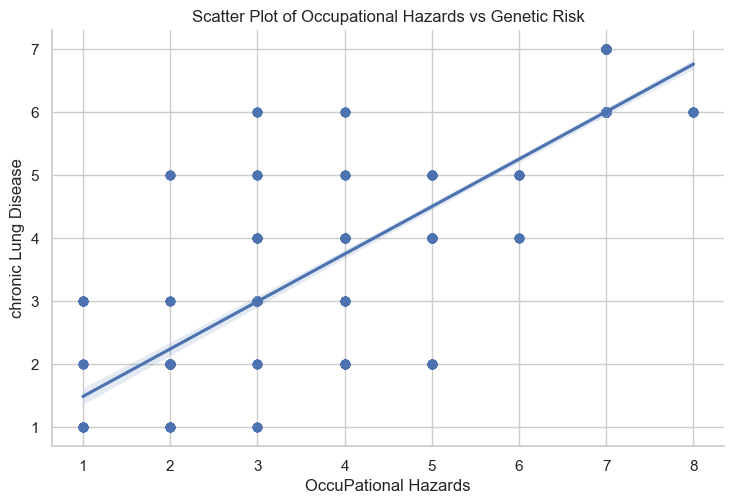

In [283]:
sns.lmplot(x='OccuPational Hazards', y='chronic Lung Disease', data=cancer_df, aspect=1.5, scatter_kws={'alpha': 0.5})
plt.title('Scatter Plot of Occupational Hazards vs Genetic Risk')
plt.show()

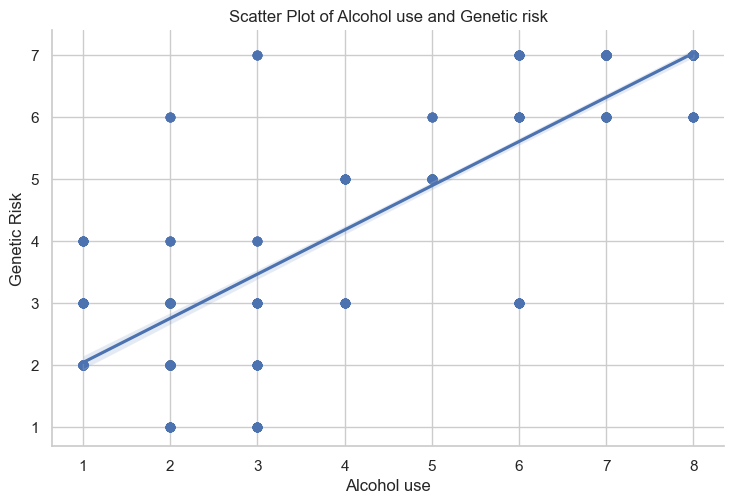

In [284]:
sns.lmplot(x='Alcohol use', y='Genetic Risk', data=cancer_df, aspect=1.5, scatter_kws={'alpha': 0.5})
plt.title('Scatter Plot of Alcohol use and Genetic risk')
plt.show()

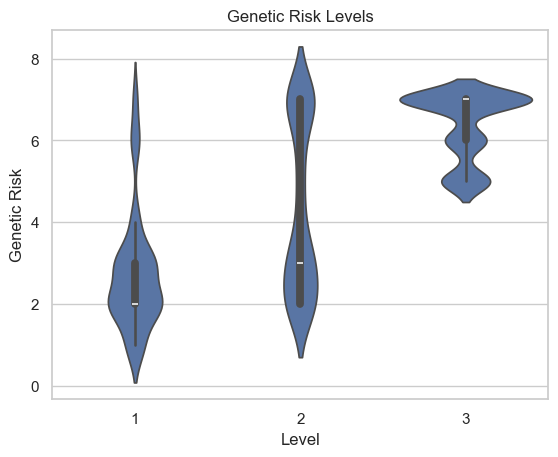

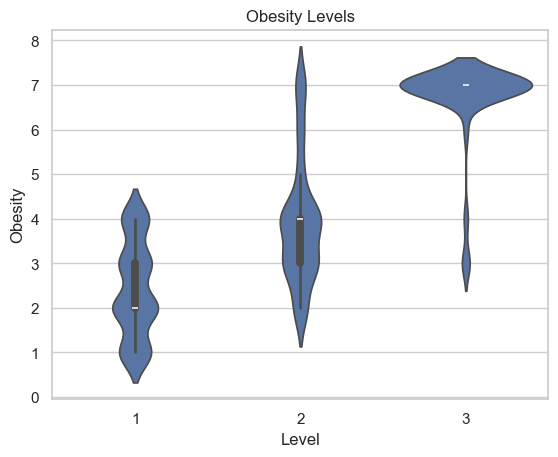

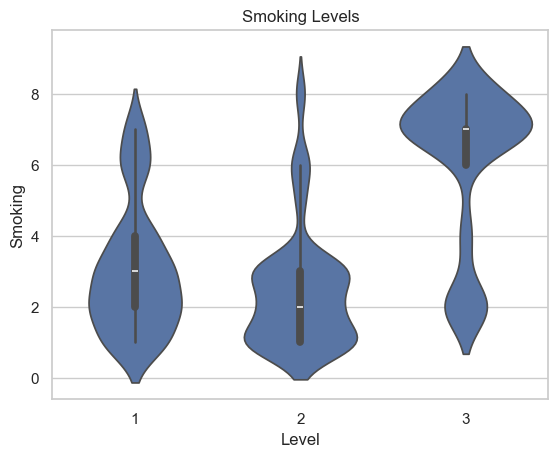

In [285]:
# Violin plot for 'Genetic Risk' by 'Level'
sns.violinplot(x='Level', y='Genetic Risk', data=cancer_df_update)
plt.title('Genetic Risk Levels')
plt.show()

# Violin plot for 'Obesity' by 'Level'
sns.violinplot(x='Level', y='Obesity', data=cancer_df_update)
plt.title('Obesity Levels')
plt.show()

# Violin plot for 'Smoking' by 'Level'
sns.violinplot(x='Level', y='Smoking', data=cancer_df_update)
plt.title('Smoking Levels')
plt.show()

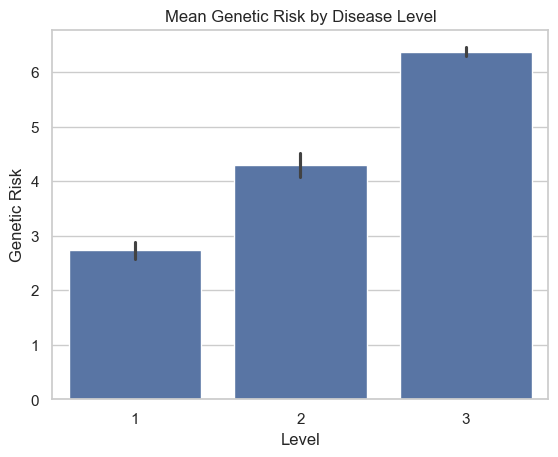

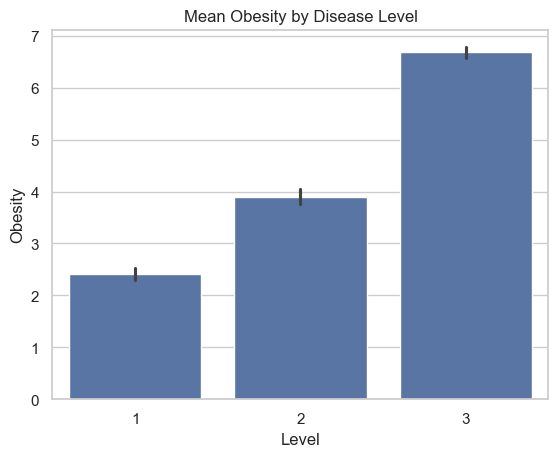

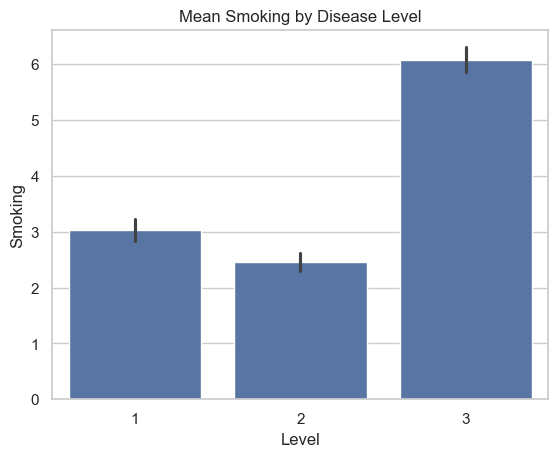

In [286]:
# Bar plot for the mean 'Genetic Risk' by 'Level'
sns.barplot(x='Level', y='Genetic Risk', data=cancer_df_update, estimator=np.mean)
plt.title('Mean Genetic Risk by Disease Level')
plt.show()

# Bar plot for the mean 'Obesity' by 'Level'
sns.barplot(x='Level', y='Obesity', data=cancer_df_update, estimator=np.mean)
plt.title('Mean Obesity by Disease Level')
plt.show()

# Bar plot for the mean 'Smoking' by 'Level'
sns.barplot(x='Level', y='Smoking', data=cancer_df_update, estimator=np.mean)
plt.title('Mean Smoking by Disease Level')
plt.show()


In [287]:
# ANOVA for 'Genetic Risk' across the different levels
f_value, p_value = stats.f_oneway(cancer_df_update['Genetic Risk'][cancer_df_update['Level'] == 1],
                                   cancer_df_update['Genetic Risk'][cancer_df_update['Level'] == 2],
                                   cancer_df_update['Genetic Risk'][cancer_df_update['Level'] == 3])
print('ANOVA for Genetic Risk by Level:', f_value, p_value)

ANOVA for Genetic Risk by Level: 488.9807799309334 1.0316939029643608e-148


In [288]:
# Kruskal-Wallis H-test for 'Genetic Risk' across different 'Levels'
stat, p = stats.kruskal(cancer_df_update[cancer_df_update['Level'] == 1]['Genetic Risk'],
                        cancer_df_update[cancer_df_update['Level'] == 2]['Genetic Risk'],
                        cancer_df_update[cancer_df_update['Level'] == 3]['Genetic Risk'])
print('Kruskal-Wallis H-test for Genetic Risk across Levels: Statistic:', stat, 'P-value:', p)

Kruskal-Wallis H-test for Genetic Risk across Levels: Statistic: 456.46102739795 P-value: 7.598839972383026e-100


In [289]:
# Pearson correlation for 'Genetic Risk' and 'Occupational Hazards'
corr_coefficient, p_value = stats.pearsonr(cancer_df_update['Genetic Risk'], cancer_df_update['OccuPational Hazards'])
print('Correlation between Genetic Risk and Occupational Hazards:', corr_coefficient, p_value)

# Pearson correlation for 'Alcohol Use' and 'Genetic Risk'
corr_coefficient, p_value = stats.pearsonr(cancer_df_update['Alcohol use'], cancer_df_update['Genetic Risk'])
print('Correlation between Alcohol Use and Genetic Risk:', corr_coefficient, p_value)

Correlation between Genetic Risk and Occupational Hazards: 0.8930485226784648 0.0
Correlation between Alcohol Use and Genetic Risk: 0.8772098877053734 2.7193e-320


In [290]:
# Spearman's rank correlation for 'Alcohol Use' and 'Genetic Risk'
spearman_coeff, p_val = stats.spearmanr(cancer_df_update['Alcohol use'], cancer_df_update['Genetic Risk'])
print("Spearman's Rank Correlation Coefficient between Alcohol use and Genetic Risk:", spearman_coeff, 'P-value:', p_val)

Spearman's Rank Correlation Coefficient between Alcohol use and Genetic Risk: 0.8482912142734498 P-value: 8.247769974262811e-278


In [291]:
import pandas as pd

# Create a DataFrame to hold the results
test_results = pd.DataFrame({
    'Test': ['ANOVA', 'Kruskal-Wallis', 'Pearson Correlation (Genetic Risk & Occupational Hazards)',
             'Pearson Correlation (Alcohol Use & Genetic Risk)', "Spearman's Rank Correlation (Alcohol use & Genetic Risk)"],
    'Statistic': [488.98, 456.46, 0.893, 0.877, 0.848],
    'P-Value': [1.03169e-148, 7.59884e-100, 0.0, 2.7193e-320, 8.24777e-278],
    'Comments': ['Significant difference across Levels',
                 'Significant distribution difference across Levels',
                 'Strong positive relationship',
                 'Strong positive relationship',
                 'Strong positive association']
})

# Display the DataFrame
print(test_results)

# Output to LaTeX format - useful for LaTeX documents
latex_output = test_results.to_latex(index=False)
print(latex_output)

# Save to Excel format - useful for Word or other document editors
test_results.to_excel('statistical_test_results.xlsx', index=False)

# Save to CSV format - alternative for importing into various programs
test_results.to_csv('statistical_test_results.csv', index=False)

                                                Test  Statistic  \
0                                              ANOVA    488.980   
1                                     Kruskal-Wallis    456.460   
2  Pearson Correlation (Genetic Risk & Occupation...      0.893   
3   Pearson Correlation (Alcohol Use & Genetic Risk)      0.877   
4  Spearman's Rank Correlation (Alcohol use & Gen...      0.848   

         P-Value                                           Comments  
0  1.031690e-148               Significant difference across Levels  
1  7.598840e-100  Significant distribution difference across Levels  
2   0.000000e+00                       Strong positive relationship  
3  2.719337e-320                       Strong positive relationship  
4  8.247770e-278                        Strong positive association  
\begin{tabular}{lrrl}
\toprule
Test & Statistic & P-Value & Comments \\
\midrule
ANOVA & 488.980000 & 0.000000 & Significant difference across Levels \\
Kruskal-Wallis & 456.460

# Predictive Analytics
Once the problem you want to tackle has been assessed and refined, you can proceed with the predictive analytics part. As a reminder, the main goal of predictive analytics is to build a predictive model in order to be able to make predictions on unseen data, based on the informative content of the existing data.
Required activities
- Identify the target variable y for the predictive problem at hand
- Analyze the distribution of the target variable y: Is it balanced or unbalanced?
- Split the available data into a training-testing-validation set.
o The training set will be used to train the predictive model.
o The testing set will be used to assess the model performance.
o The validation set is a subset of data which will be set aside (unseen from the
model) and used to simulate the future data that the model will need to predict.
- According to the defined problem (regression/binary classification/multiclass classification)
o Select at least two different appropriate performance metrics
o Assess one baseline model and at least three different supervised predictive
models using the aforementioned performance metric
- (Optionally) Employ unsupervised techniques to further extract insights from the data
- Critically discuss the modeling choices and the outcomes of the previous steps.
Note: Please note that developing a prototype is, by definition, an iterative process, so don’t be afraid to
go back to problem definition and adjust it as you gain a better understanding of the problem at hand.

In [292]:
# Step 1: Load the dataset
data_df = pd.read_excel('Project_Data/cancer patient data sets.xlsx')

# Step 2: Data preprocessing
# Assuming 'Level' is the target variable
X = data_df.drop(['Patient Id', 'Level'], axis=1)  # Features
y = data_df['Level']  # Target

# Step 3: Feature selection (you can replace this with your own feature selection technique)
# For demonstration, let's use all features
selected_features = X.columns

# Step 4: Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X[selected_features], y, test_size=0.2, random_state=42)

# Step 5: Model selection and training
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Step 6: Model evaluation
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Step 7: Predictions
# Use the trained model to make predictions on new data

# Example new data (replace this with your own new data)
new_data = pd.DataFrame({
    'Age': [45],
    'Gender': [1],
    'Air Pollution': [3],
    'Alcohol use': [2],
    'Dust Allergy': [4],
    'OccuPational Hazards': [5],
    'Genetic Risk': [6],
    'chronic Lung Disease': [3],
    'Balanced Diet': [7],
    'Obesity': [4],
    'Smoking': [6],
    'Passive Smoker': [2],
    'Chest Pain': [1],
    'Coughing of Blood': [1],
    'Fatigue': [2],
    'Weight Loss': [1],
    'Shortness of Breath': [3],
    'Wheezing': [2],
    'Swallowing Difficulty': [1],
    'Clubbing of Finger Nails': [1],
    'Frequent Cold': [2],
    'Dry Cough': [1],
    'Snoring': [3]
})

# Make predictions
predictions = model.predict(new_data)

# Print predictions
print("Predicted cancer levels for new data:", predictions)

Accuracy: 1.0
Predicted cancer levels for new data: ['Low']


# Model Explainability

### Intrinsic Explainability

In [293]:
cancer_df

,Patient Id,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,Balanced Diet,...,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level
0,P1,33,1,2,4,5,4,3,2,2,...,3,4,2,2,3,1,2,3,4,1
1,P10,17,1,3,1,5,3,4,2,2,...,1,3,7,8,6,2,1,7,2,2
2,P100,35,1,4,5,6,5,5,4,6,...,8,7,9,2,1,4,6,7,2,3
3,P1000,37,1,7,7,7,7,6,7,7,...,4,2,3,1,4,5,6,7,5,3
4,P101,46,1,6,8,7,7,7,6,7,...,3,2,4,1,4,2,4,2,3,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,P995,44,1,6,7,7,7,7,6,7,...,5,3,2,7,8,2,4,5,3,3
996,P996,37,2,6,8,7,7,7,6,7,...,9,6,5,7,2,4,3,1,4,3
997,P997,25,2,4,5,6,5,5,4,6,...,8,7,9,2,1,4,6,7,2,3
998,P998,18,2,6,8,7,7,7,6,7,...,3,2,4,1,4,2,4,2,3,3


In [294]:
# Get a list of feature names (excluding the outcome variable: income)
cancer_df.drop(['Patient Id'], axis=1, inplace=True)

In [295]:
# Get a list of feature names (excluding the outcome variable: income)
feature_names = cancer_df.columns[:-1]
feature_names

Index(['Age', 'Gender', 'Air Pollution', 'Alcohol use', 'Dust Allergy',
       'OccuPational Hazards', 'Genetic Risk', 'chronic Lung Disease',
       'Balanced Diet', 'Obesity', 'Smoking', 'Passive Smoker', 'Chest Pain',
       'Coughing of Blood', 'Fatigue', 'Weight Loss', 'Shortness of Breath',
       'Wheezing', 'Swallowing Difficulty', 'Clubbing of Finger Nails',
       'Frequent Cold', 'Dry Cough', 'Snoring'],
      dtype='object')

In [296]:
# Mark labels and encode them using sklearn
labels = cancer_df.iloc[:, -1]
le = sklearn.preprocessing.LabelEncoder()
le.fit(labels)
labels_intrinsic = le.transform(labels)
class_names = le.classes_
data_intrinsic = cancer_df.iloc[:, :-1]
le_label_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print("Class names: ", class_names)
print("Label mapping: ", le_label_mapping)
# Check if there are categorical varibles that we need to make dummies for
print(data_intrinsic.dtypes)

Class names:  [1 2 3]
Label mapping:  {1: 0, 2: 1, 3: 2}
Age                         int64
Gender                      int64
Air Pollution               int64
Alcohol use                 int64
Dust Allergy                int64
OccuPational Hazards        int64
Genetic Risk                int64
chronic Lung Disease        int64
Balanced Diet               int64
Obesity                     int64
Smoking                     int64
Passive Smoker              int64
Chest Pain                  int64
Coughing of Blood           int64
Fatigue                     int64
Weight Loss                 int64
Shortness of Breath         int64
Wheezing                    int64
Swallowing Difficulty       int64
Clubbing of Finger Nails    int64
Frequent Cold               int64
Dry Cough                   int64
Snoring                     int64
dtype: object


In [297]:
# Get a list of which variables are categorical
categorical_features = [i for i in range(len(data_intrinsic.dtypes)) if data_intrinsic.dtypes[i] == 'object']
print("Indices of categorical features: ", categorical_features)

Indices of categorical features:  []


C:\Users\TimEW\AppData\Local\Temp\ipykernel_15872\1485966769.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  categorical_features = [i for i in range(len(data_intrinsic.dtypes)) if data_intrinsic.dtypes[i] == 'object']
C:\Users\TimEW\AppData\Local\Temp\ipykernel_15872\1485966769.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  categorical_features = [i for i in range(len(data_intrinsic.dtypes)) if data_intrinsic.dtypes[i] == 'object']
C:\Users\TimEW\AppData\Local\Temp\ipykernel_15872\1485966769.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys w

In [298]:
print("Shape: ", data_intrinsic.shape)
data_intrinsic.head()

Shape:  (1000, 23)


,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,Balanced Diet,Obesity,...,Coughing of Blood,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring
0,33,1,2,4,5,4,3,2,2,4,...,4,3,4,2,2,3,1,2,3,4
1,17,1,3,1,5,3,4,2,2,2,...,3,1,3,7,8,6,2,1,7,2
2,35,1,4,5,6,5,5,4,6,7,...,8,8,7,9,2,1,4,6,7,2
3,37,1,7,7,7,7,6,7,7,7,...,8,4,2,3,1,4,5,6,7,5
4,46,1,6,8,7,7,7,6,7,7,...,9,3,2,4,1,4,2,4,2,3


In [299]:
categorical_names = {}
for feature in categorical_features:
    print("Feature: ", feature)
    # Use label encoder to map categories to numbers
    le = sklearn.preprocessing.LabelEncoder()
    le.fit(data_intrinsic.iloc[:, feature])
    # Replace the categories with corresponding numbers in the original data
    data_intrinsic.iloc[:, feature] = le.transform(data_intrinsic.iloc[:, feature])
    # Store and print the mappings for reference later
    categorical_names[feature] = le.classes_
    print(categorical_names[feature])
    print("==================================================")

In [300]:
# This variable is where we store the original names of each category for each variable
categorical_names

{}

In [301]:
# We can (and will) use this encoder function to transform the categorical columns into dummies-- 
# but we can't do that to the original dataset if we want to use LIME After training
encoder = ColumnTransformer(transformers=[('get_dummies', OneHotEncoder(), categorical_features)], remainder='passthrough')
encoder = encoder.fit(data_intrinsic)

In [302]:
train_intrinsic, test_intrinsic, labels_train_intrinsic, labels_test_intrinsic= sklearn.model_selection.train_test_split(data_intrinsic, labels_intrinsic, train_size=0.80, random_state=10)
print("Train shape: ", train_intrinsic.shape)
print("Test shape: ", test_intrinsic.shape)

Train shape:  (800, 23)
Test shape:  (200, 23)


In [303]:
# Fit the model
gbtree_intrinsic = xgboost.XGBClassifier(n_estimators=200, max_depth=5)
gbtree_intrinsic.fit(encoder.transform(train_intrinsic), labels_train_intrinsic)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=200, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [304]:
# Make predictions 
pred_labels_test_intrinsic = gbtree_intrinsic.predict(encoder.transform(test_intrinsic))
# Calcualte accuracy on the test set
print("Test set accuracy: ", sklearn.metrics.accuracy_score(labels_test_intrinsic, pred_labels_test_intrinsic))

Test set accuracy:  1.0


### Prepare for the feature importance plot of the instrinsic explainability

In [305]:
# Get feature names for the transformed dataset so that they'll show up on the plot 
gbtree_features_orig = gbtree_intrinsic.get_booster().feature_names
gbtree_features = []
for cat_var in categorical_names:
    cat_var_names = [str(feature_names[cat_var]) + " = " + str(cat) for cat in categorical_names[cat_var]]
    gbtree_features.extend(cat_var_names)
gbtree_features.extend([feature_names[i] for i in range(len(feature_names)) if i not in categorical_features])
gbtree_intrinsic.get_booster().feature_names = gbtree_features

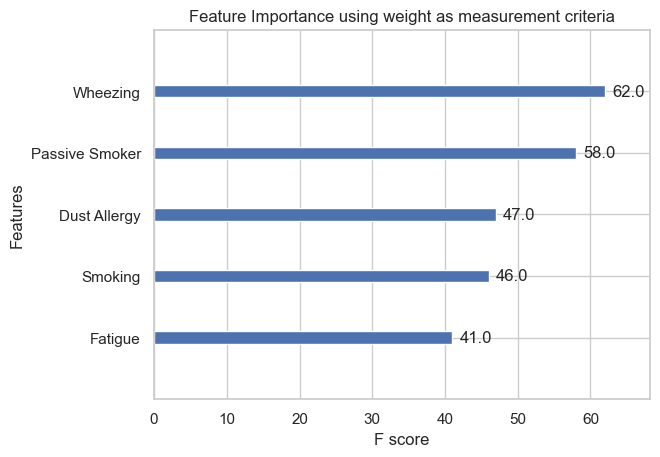

In [306]:
# The weight importance plot
xgboost.plot_importance(gbtree_intrinsic, importance_type="weight", max_num_features=5)
plt.title("Feature Importance using weight as measurement criteria")
plt.show()

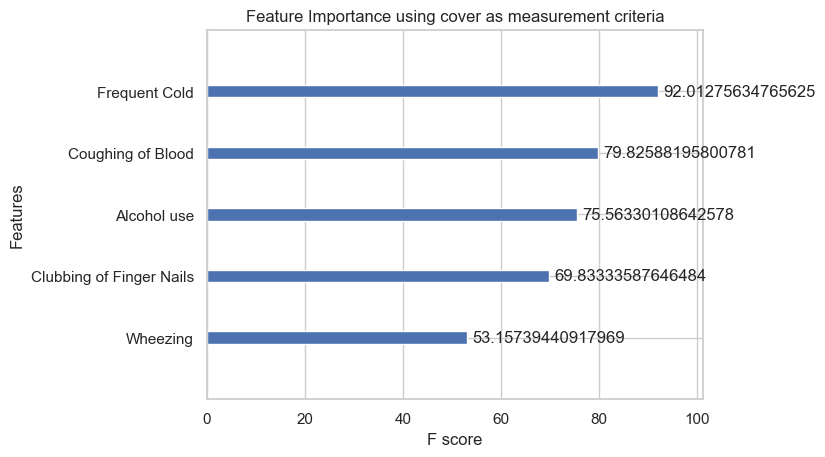

In [307]:
# The cover importance plot
xgboost.plot_importance(gbtree_intrinsic, importance_type="cover", max_num_features=5)
plt.title("Feature Importance using cover as measurement criteria")
plt.show()

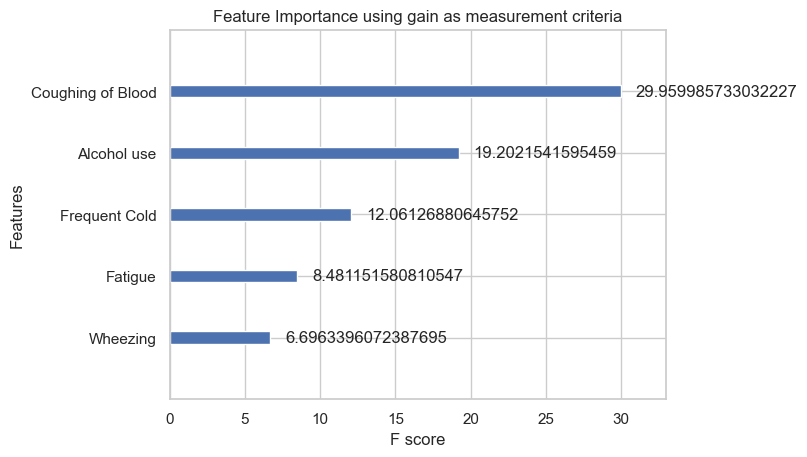

In [308]:
# The gain importance plot
xgboost.plot_importance(gbtree_intrinsic, importance_type="gain", max_num_features=5)
plt.title("Feature Importance using gain as measurement criteria")
plt.show()

### Post-hoc explainability (using SHAP)

In [312]:
# Fit the model
gbtree_shap = xgboost.XGBClassifier(n_estimators=200, max_depth=5)
gbtree_shap.fit(train_intrinsic, labels_train_intrinsic)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=200, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [314]:
# Make predictions and measure the accuracy
pred_labels_test = gbtree_shap.predict(test_intrinsic)
print("Test set accuracy: ", sklearn.metrics.accuracy_score(labels_test_intrinsic, pred_labels_test))

Test set accuracy:  1.0


In [316]:
# Creating the post-hoc explainer with shap
explainer = shap.TreeExplainer(gbtree_shap)
shap_values = explainer.shap_values(test_intrinsic)

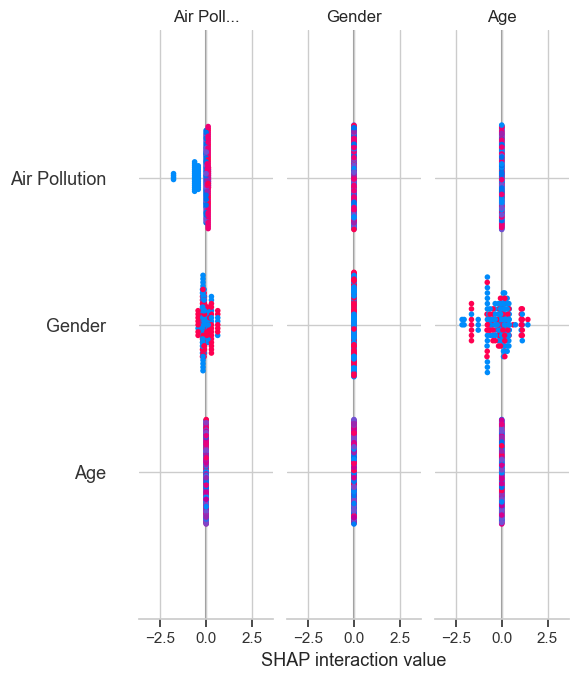

In [336]:
# Plotting the explanation and most relevant values
shap.summary_plot(shap_values, test_intrinsic)

In [335]:
#i is the index of the data point of interest
i = 0
_waterfall.waterfall_legacy(explainer.expected_value, shap_values[i, :], test_intrinsic.iloc[i, :])

Exception: waterfall_plot requires a scalar expected_value of the model output as the first parameter, but you have passed an array as the first parameter! Try shap.waterfall_plot(explainer.expected_value[0], shap_values[0], X[0]) or for multi-output models try shap.waterfall_plot(explainer.expected_value[0], shap_values[0][0], X[0]).

In [334]:
# Studying specific points of interest
i=0
shap.force_plot(explainer.expected_value[i], shap_values[i])

In [326]:
shap.initjs()
shap.force_plot(explainer.expected_value[i], shap_values[:1000, :])

TypeError: In v0.20, force plot now requires the base value as the first parameter! Try shap.plots.force(explainer.expected_value, shap_values) or for multi-output models try shap.plots.force(explainer.expected_value[0], shap_values[..., 0]).

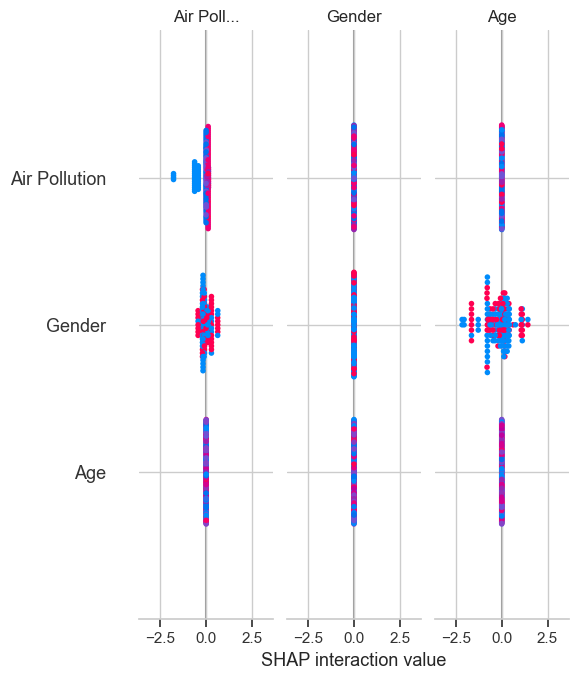

In [329]:
shap.initjs()
shap.summary_plot(shap_values, test_intrinsic)

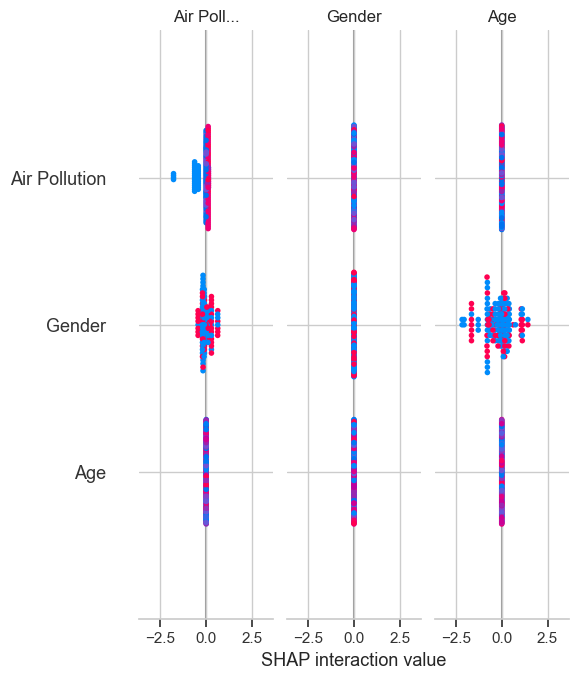

In [330]:
# Summary plots with Possibility to filter and/or create cohort plots
# First 1000
shap.summary_plot(shap_values[:1000, :], test_intrinsic.iloc[:1000, :])